In [80]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_csv('creditcard.csv')

In [82]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [83]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [84]:
df.isna().sum().sum()

0

<AxesSubplot:xlabel='Class', ylabel='count'>

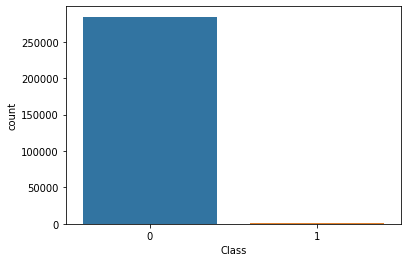

In [85]:
sns.countplot('Class', data=df)

In [86]:
s = StandardScaler()
df['Amount'] = s.fit_transform(df['Amount'].values.reshape(-1, 1))

In [88]:
def oversample(df):
    df_fraud = df[df['Class'] == 1]
    df_n_fraud = df[df['Class'] == 0]
    df_fraud = resample(df_fraud, n_samples=len(df_n_fraud))
    df = pd.concat([df_fraud, df_n_fraud])
    df = df.sample(frac=1)
    return df.drop('Class', 1), df['Class']
def undersample(df):
    fraud = df[df['Class'] == 1]
    nfraud = df[df['Class'] == 0].sample(frac=1).iloc[:len(fraud)]
    df = pd.concat([fraud, nfraud], 0).sample(frac=1)
    return df.drop('Class', 1), df['Class']

In [89]:
y = df['Class']
X = df.drop('Class', 1)

In [90]:
X.drop('Time', 1, inplace=True)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

<AxesSubplot:xlabel='Class', ylabel='count'>

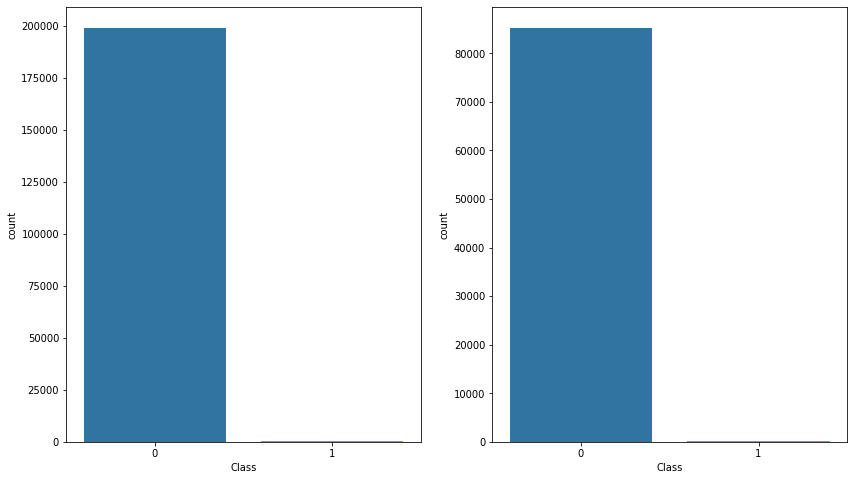

In [95]:
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.subplot(1, 2, 2)
sns.countplot(y_test)

In [124]:
cv = StratifiedKFold()
for c in [0.01, 0.1, 1, 10, 100]:
    acc = {'acc_oversample': [], 'acc_undersample': []}
    roc = {'auc_oversample': [], 'auc_undersample': []}
    prec = {'precision_oversample': [], 'precision_undersample': []}
    rec = {'recall_oversample': [], 'recall_undersample': []}
    for train_ind, test_ind in cv.split(X_train, y_train):
        clf = LogisticRegression()
        X_train_ovs, y_train_ovs = oversample(pd.concat([X_train.iloc[train_ind], y_train.iloc[train_ind]], 1))
        X_train_un, y_train_un = undersample(pd.concat([X_train.iloc[train_ind], y_train.iloc[train_ind]], 1))
        X_test1, y_test1 = X_train.iloc[test_ind], y_train.iloc[test_ind]
        clf.fit(X_train_ovs, y_train_ovs)
        acc['acc_oversample'].append(accuracy_score(y_test1, clf.predict(X_test1)))
        roc['auc_oversample'].append(roc_auc_score(y_test1, clf.predict_proba(X_test1)[:, 1]))
        prec['precision_oversample'].append(precision_score(y_test1, clf.predict(X_test1)))
        rec['recall_oversample'].append(recall_score(y_test1, clf.predict(X_test1)))
        clf = LogisticRegression()
        clf.fit(X_train_un, y_train_un)
        acc['acc_undersample'].append(accuracy_score(y_test1, clf.predict(X_test1)))
        roc['auc_undersample'].append(roc_auc_score(y_test1, clf.predict_proba(X_test1)[:, 1]))
        prec['precision_undersample'].append(precision_score(y_test1, clf.predict(X_test1)))
        rec['recall_undersample'].append(recall_score(y_test1, clf.predict(X_test1)))
    print(c)
    for metric in [acc, roc, prec, rec]:
        for key in metric:
            print(key, np.mean(metric[key]))
    print()

0.01
acc_oversample 0.9796101743974116
acc_undersample 0.96578121415309
auc_oversample 0.9781649353999988
auc_undersample 0.9785915162685909
precision_oversample 0.07301358673082603
precision_undersample 0.04614000630314282
recall_oversample 0.915686274509804
recall_undersample 0.9156010230179028

0.1
acc_oversample 0.9795800777118233
acc_undersample 0.9651541789241838
auc_oversample 0.9782440501509398
auc_undersample 0.977885343425753
precision_oversample 0.07287848215795813
precision_undersample 0.04438756086421397
recall_oversample 0.915686274509804
recall_undersample 0.9156436487638533

1
acc_oversample 0.9795951267465213
acc_undersample 0.9672207428982285
auc_oversample 0.9782259692270472
auc_undersample 0.9774762014818904
precision_oversample 0.07293674331427313
precision_undersample 0.04666222069844585
recall_oversample 0.915686274509804
recall_undersample 0.9214833759590793

10
acc_oversample 0.9794195678421845
acc_undersample 0.9671555236632325
auc_oversample 0.978204895698213

In [138]:
clf = LogisticRegression(C=100)
X_tr_ov, y_tr_ov = oversample(pd.concat([X_train, y_train], 1))
clf.fit(X_tr_ov, y_tr_ov)

LogisticRegression(C=100)

In [139]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.89      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443



In [128]:
clf = LogisticRegression(C=100)
clf.fit(X_train, y_train)

LogisticRegression(C=100)

In [129]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.55      0.67       148

    accuracy                           1.00     85443
   macro avg       0.94      0.77      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [130]:
X_und, y_und = undersample(pd.concat([X_train, y_train], 1))

In [131]:
X_und

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
15204,-19.179826,11.817922,-21.919174,6.086236,-14.708845,-4.308888,-15.357952,12.857165,-3.999861,-8.928656,...,1.572950,1.746802,-1.353149,-0.762965,0.117028,1.297994,-0.224825,1.621052,0.484614,0.046539
149600,-5.100256,3.633442,-3.843919,0.183208,-1.183997,1.602139,-3.005953,-8.645038,1.285458,-3.717481,...,-2.806302,8.280439,-2.797150,1.090707,-0.159260,0.532156,-0.497126,0.943622,0.553581,0.691151
78543,0.928383,-0.740772,1.119004,0.209722,-1.140390,0.321234,-0.694171,0.293803,0.899091,-0.374962,...,0.094585,-0.082417,-0.187203,0.037458,0.306394,-0.024806,0.931878,-0.037772,0.019479,0.058573
107114,-0.193450,1.078504,1.112380,-0.174098,0.640038,-0.440539,0.975337,-0.289905,-0.323840,-0.328769,...,0.278517,-0.357769,-0.746815,-0.156064,-0.483604,-0.043810,0.092412,0.084899,-0.131086,-0.317287
150715,-11.397727,7.763953,-18.572307,6.711855,-10.174216,-4.395918,-15.893788,2.083013,-4.988837,-15.346099,...,0.208879,0.339007,1.342923,0.239217,0.534644,-0.174965,-0.500240,-1.722060,-0.574339,-0.307651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83053,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,-3.236784,...,0.222667,0.556895,0.169776,-0.174357,0.308061,0.710996,-0.231030,0.580495,0.300984,-0.328161
15539,-22.561699,13.208904,-24.643819,6.232532,-16.905611,-4.497439,-16.810184,14.955107,-3.871297,-8.581266,...,1.621444,1.765987,-1.635517,-0.998317,0.138972,1.559350,-0.222125,1.504425,0.445920,0.046539
230030,-1.293587,-0.957581,-2.705291,-0.302001,1.850912,-1.917730,1.290929,-0.031813,-0.539814,-0.379361,...,0.634694,0.720313,1.312116,0.422841,0.563384,-1.089768,0.633621,0.307788,0.086260,0.438392
43160,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,-7.701499,-14.226698,...,-1.614660,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,0.738288


In [134]:
clf = LogisticRegression()
clf.fit(X_und, y_und)

LogisticRegression()

In [135]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.90      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.93      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [140]:
clf = RandomForestClassifier(500)
clf.fit(X_und, y_und)

RandomForestClassifier(n_estimators=500)

In [141]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.87      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [142]:
clf.fit(X_tr_ov, y_tr_ov)

RandomForestClassifier(n_estimators=500)

In [143]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.73      0.82       148

    accuracy                           1.00     85443
   macro avg       0.97      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443

